## Why not compare the time series using standard distance measure like, euclidean maybe? 

<font size='2'> Consider two people walking in a similar way, but one is walking fast and other slow. They will be constantly out of phase, yet, are walking in a similar fashion. If you are only given the traces of their walk at different time points and to see whether their walks are similiar, by doing point-to-point comparison, you'll feel they are not walking in a similar fashion.   
    
![Alt Text](https://upload.wikimedia.org/wikipedia/commons/9/97/Two_repetitions_of_a_walking_sequence_of_an_individual_recorded_using_a_motion-capture_system.gif)

### Package installation

In [17]:
install.packages('TSclust')
install.packages('mpmi')
library(TSclust)
library(mpmi)
library(caret)

Loading required package: ggplot2

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:httr’:

    progress




<font size='3'> Comparing two Sine Waves

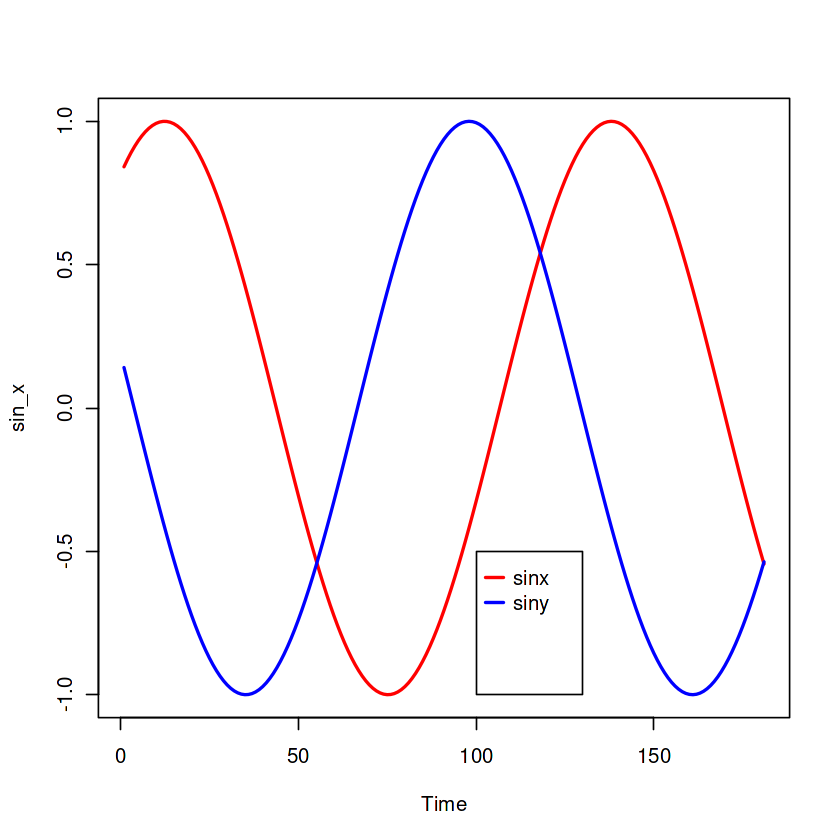

In [1]:
x=seq(1,10,0.05)
sin_x=sin(x)
y=seq(3,12,0.05)
sin_y=sin(y)
ts.plot(sin_x,col='red',lwd=2)
lines(sin_y,col='blue',lwd=2)
legend(x=c(100,130),y=c(-1,-0.5),legend=c('sinx','siny'),col=c('red','blue'),lwd=c(2,2))

### DTW Code from scratch

In [2]:
cost_matrix=function(series_x,series_y,cost_matrix_flag=FALSE,warp_path_flag=FALSE,dist_func="euclidean")
{
    # series_x: 1st time series
    # series_y: 2nd time series
    # cost_matrix: do you want cost_matrix as well?
    # dist_func=distance function you want to use. By default it is euclidean
    dtw=matrix(0,nrow=length(series_x),ncol=length(series_y))
    dtw[1,1]=dist(c(series_x[1],series_y[1]),method=dist_func)[1]
    for (i in 1: length(series_x))   
    { 
        # i: is the iteration over series_x
    for (j in 1: length(series_y))
    {
        d_i_j=dist(c(series_x[i],series_y[j]),method=dist_func)[1]
        # j: is the iteration over series_y    
        if (i==1 && j>1)
        {
        dtw[i,j]=d_i_j+dtw[i,j-1]
           
        }
        else if (j==1 && i>1)
        {
        dtw[i,j]=d_i_j+min(c(dtw[i-1,j]))
           
        }
        else if (j>1 && i>1)
        {
        dtw[i,j]=d_i_j+min(c(dtw[i-1,j],dtw[i,j-1],dtw[i-1,j-1]))
           
        }    
        
        
            }
        
        }
    return (dtw)
    
}

cost=function(cost_mat,cost_matrix_flag=FALSE,warp_path_flag=FALSE)
    {

    nrow=dim(cost_mat)[1]
    ncol=dim(cost_mat)[2]
    cost=c()
    cost_counter=1
    cost[cost_counter]= cost_mat[nrow,ncol]
    i=nrow
    j=ncol
    
    while(TRUE)
        {
        if(i>1 && j>1)
        {
             cost_counter=cost_counter+1
            min_vec=c(cost_mat[i-1,j],cost_mat[i,j-1],cost_mat[i-1,j-1])
            cost[cost_counter]=min(min_vec)
            if(which.min(min_vec)==1)
                {
                i=i-1
                }
            else if(which.min(min_vec)==2)
                {
                j=j-1
                }
            else
                {
                i=i-1
                j=j-1
                }
       
           if (i==1 && j==1)
               break
                
                }
        else if(i>1 && j==1)
        {
            cost_counter=cost_counter+1
            cost[cost_counter]=cost_mat[i-1,j]
            i=i-1
            if (i==1 && j==1)
               break
        }
            
        else if(i==1 && j>1)
        {
            cost_counter=cost_counter+1
            cost[cost_counter]=cost_mat[i,j-1]
            j=j-1
            if (i==1 && j==1)
               break
        }
   

    }
    cost_avg=mean(cost)    
    
    if(cost_matrix_flag==TRUE && warp_path_flag==TRUE) 
        {
        dtw_obj=list(cost_matrix=cost_mat,warp_path=cost,dtw_dist=cost_avg)
        }
    else if(cost_matrix_flag==TRUE && warp_path_flag==FALSE) 
        {
        dtw_obj=list(cost_matrix=cost_mat,dtw_dist=cost_avg)
        }
    else if(cost_matrix_flag==FALSE && warp_path_flag==TRUE) 
        {
        dtw_obj=list(warp_path=cost,dtw_dist=cost_avg)
        }
    if(cost_matrix_flag==FALSE && warp_path_flag==FALSE) 
        {
        dtw_obj=list(dtw_dist=cost_avg)
        }
    
     return (dtw_obj)   
        
    }

dtw_distance=function(x,y,dist='euclidean',return_cost_matrix=FALSE,return_warp_path=FALSE)
{
    
    dtw_object=cost(cost_matrix(x,y,dist_func=dist),cost_matrix_flag = return_cost_matrix,warp_path_flag=return_warp_path)
    
    return(dtw_object)
    
}

### Comparing two similar Time Series

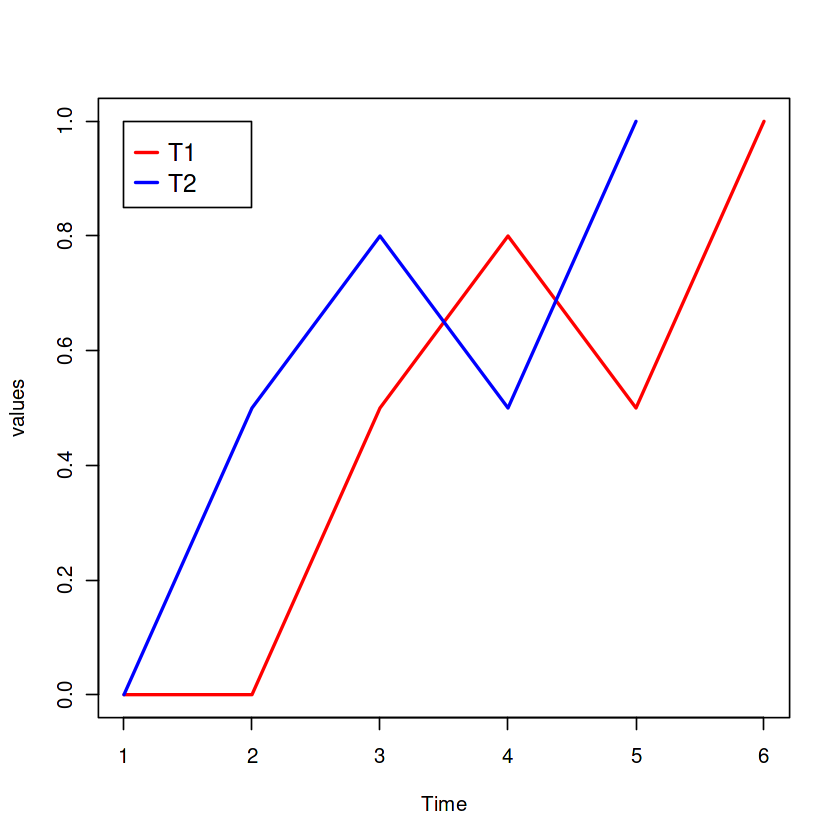

In [4]:
t1=c(0,0,0.5,0.8,0.5,1)
t2=c(0,0.5,0.8,0.5,1)
ts.plot(t1,col='red',lwd=2,ylab='values')
lines(t2,col='blue',lwd=2)
legend(x=c(1,2),y=c(0.85,1),legend=c('T1','T2'),col=c('red','blue'),lwd=c(2,2),cex=1.2)

<font size= '3'> DTW distance between T1 and T2 is 1

In [19]:
dtw_val=dtw_distance(t1,t2)
#paste('dtw between T1 and T2 is: ',dtw_val)
#t1_t2=rbind(t1,t2)
#diss(t1_t2,"DTW")

In [9]:
#dtw_distance(series_x,series_y,return_cost_matrix = T,return_warp_path = T)

### DTW when adding a constant line in between

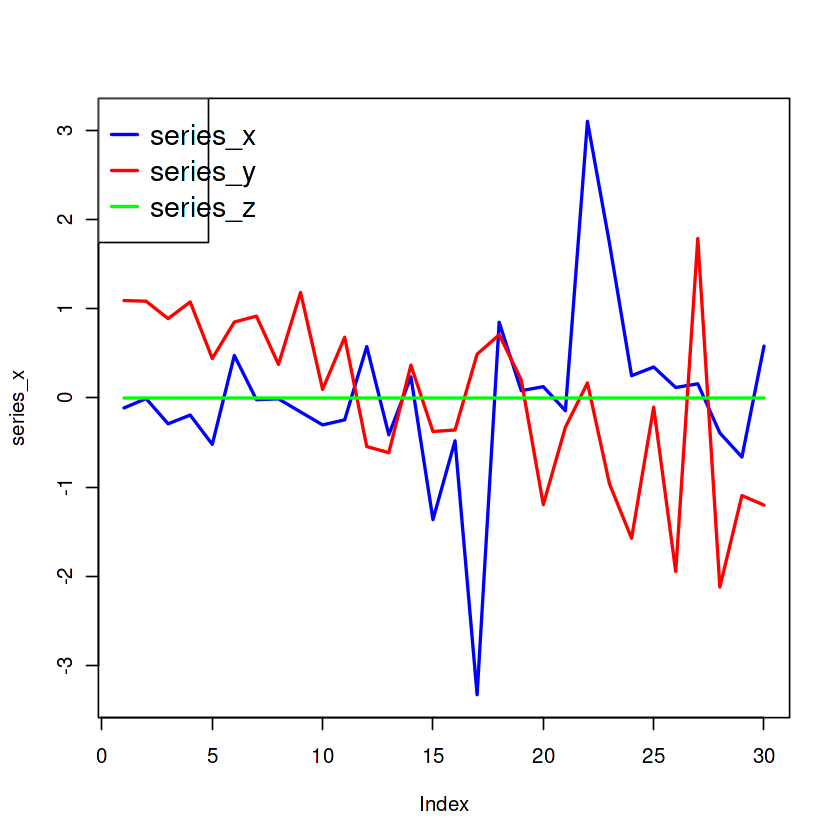

In [10]:
set.seed(1045)
{
n=30
x=rnorm(n,2,5)
y=rnorm(n,-4,5)
alpha_x=alpha_y=2.9
beta_x=beta_y=2.1
series_x=c()
series_y=c()
series_y=rnorm(5)
for (i in 1:n)
{
    series_x[i]=(x[i]*i*alpha_x)+beta_x
    
    if (i>=3)
        {
    series_y[i]=(y[i]*i*alpha_y)+beta_y
        
    }
    
    
}
    }

series_x=c(scale(series_x))
series_y=c(scale(series_y))
series_z=rep(0,n)
plot(series_x,lwd='2',col='blue',type='l')
lines(series_y,col='red',lwd='2')
lines(series_z,col='green',lwd='2')

legend('topleft',legend=c('series_x','series_y','series_z'),col=c('blue','red','green'),lwd=c(2,2,2),cex=1.4)

In [13]:
library(TSclust)
ts_mat=rbind(series_x,series_y,series_z)
diss(ts_mat,'DTW')

ERROR: Error in library(TSclust): there is no package called ‘TSclust’


### Comparing Tangent waves

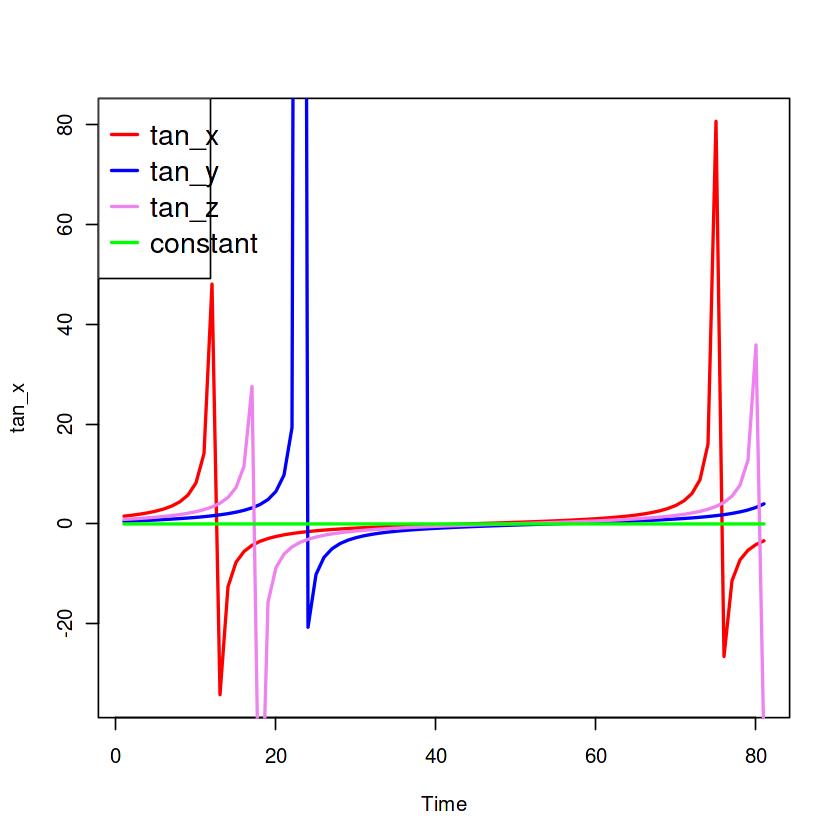

In [12]:
x=seq(1,5,0.05)
tan_x=tan(x)
y=seq(101,105,0.05)
tan_y=tan(y)
z=seq(51,55,0.05)
tan_z=tan(z)
constant=rep(0,length=length(tan_x))
ts.plot(tan_x,col='red',lwd=2)
lines(tan_y,col='blue',lwd=2)
lines(tan_z,col='violet',lwd=2)
lines(constant,col='green',lwd=2)
legend('topleft',legend=c('tan_x','tan_y','tan_z','constant'),col=c('red','blue','violet','green'),lwd=c(2,2,2,2),cex=1.4)

In [54]:
#install.packages('TSclust')
library(TSclust)
library(caret)
# Example multivariate time series (each column is a time series)
scaled_tan_x=c(scale(tan_x))
scaled_tan_y=c(scale(tan_y))
scaled_tan_z=c(scale(tan_z))
#constant=c(scale(constant))
# Combine the time series into a matrix
ts_matrix <- rbind(scaled_tan_x,scaled_tan_y,scaled_tan_z,constant)
# Calculate DTW distance
dtw_distance <- diss(ts_matrix, "DTW")

# Print the result
print(dtw_distance)

             scaled_tan_x scaled_tan_y scaled_tan_z
scaled_tan_y     34.94383                          
scaled_tan_z     36.25435     39.70613             
constant         33.38077     19.25756     31.26850


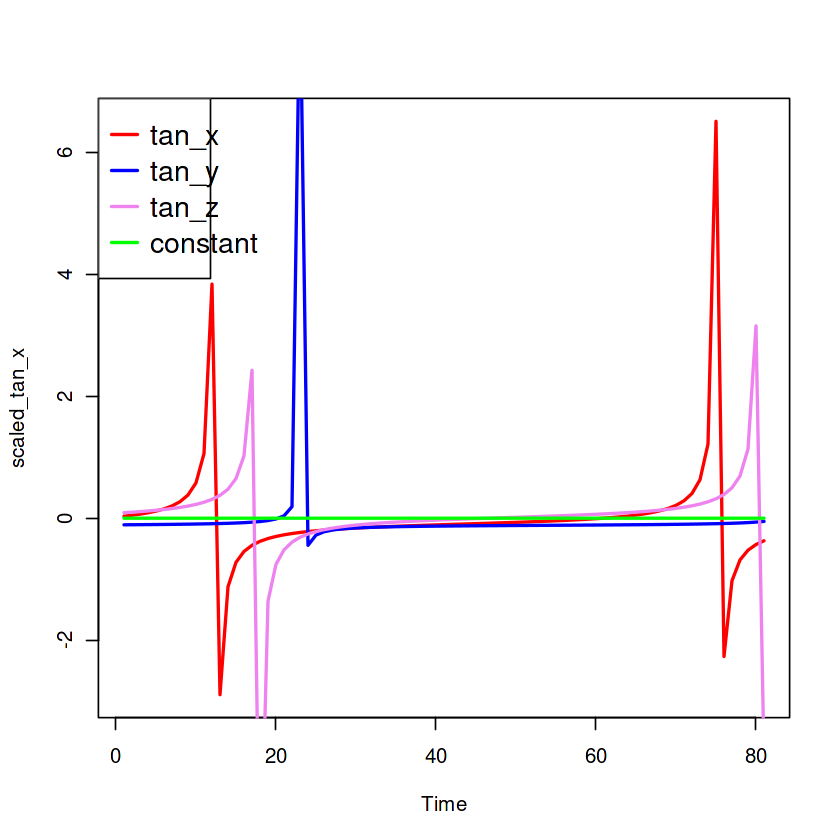

In [37]:
ts.plot(scaled_tan_x,col='red',lwd=2)
lines(scaled_tan_y,col='blue',lwd=2)
lines(scaled_tan_z,col='violet',lwd=2)
lines(constant,col='green',lwd=2)
legend('topleft',legend=c('tan_x','tan_y','tan_z','constant'),col=c('red','blue','violet','green'),lwd=c(2,2,2,2),cex=1.4)

### MI between these series

In [43]:
#install.packages('mpmi')
library(mpmi)
constant= seq(0.0001,0.0005,length=length(tan_x))
data_matrix = cbind(tan_x, tan_y,constant)
cmi(data_matrix)$mi

1.7319123,1.4033874,0.7552637
1.4033874,2.0669881,0.8220573
0.7552637,0.8220573,0.9880521


## Can we identify subpart belongs to which one of the time series

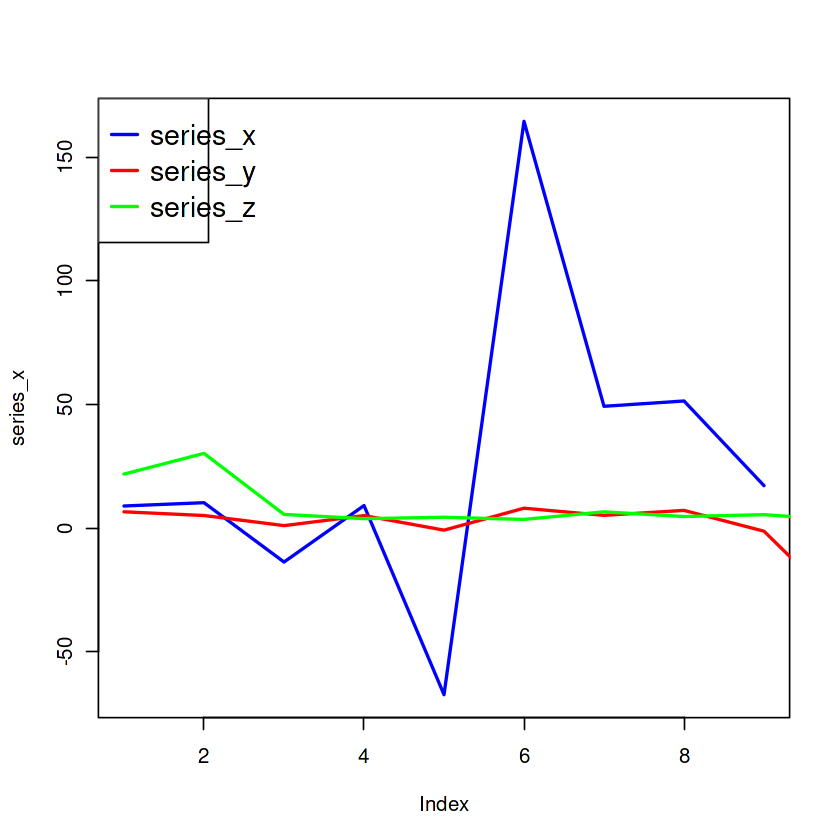

In [44]:
set.seed(1045)
{
n=30
x=rnorm(n,2,5)
y=rnorm(n,1,2)
z=rnorm(n,5,1)
alpha_x=alpha_y=alpha_z=2.9
beta_x=beta_y=beta_z=2.1
series_x=rnorm(2,2,5)
series_y=rnorm(10,1,5)
series_z=rnorm(20,5,1)
for (i in 1:n)
{
    if (i>2 && i<10)
        {
    
    series_x[i]=(x[i]*i*alpha_x)+beta_x
    }
    else if (i>=10 && i<20)
        {
    series_y[i]=(y[i]*i*alpha_y)+beta_y
        
    }
    
    else
        
    {
        series_z[i]=(z[i]*i*alpha_z)+beta_z
    }
    
}
    }

#series_x=c(scale(series_x))
#series_y=c(scale(series_y))
#series_z=c(scale(series_z))
#series_z=rep(0,n)
plot(series_x,lwd='2',col='blue',type='l')
lines(series_y,col='red',lwd='2')
lines(series_z,col='green',lwd='2')

legend('topleft',legend=c('series_x','series_y','series_z'),col=c('blue','red','green'),lwd=c(2,2,2),cex=1.4)

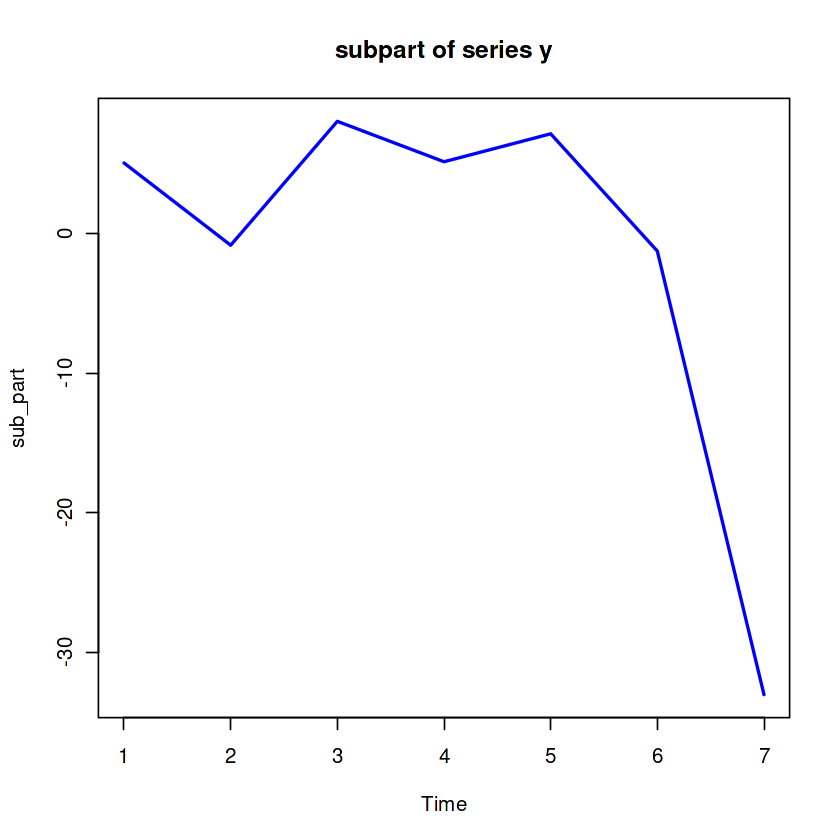

In [49]:
sub_part=series_y[4:10] # sub_part extracted from series y
ts.plot(sub_part,col='blue',lwd='2',main='subpart of series y')

### Identifying Subpart using DTW

In [52]:
#install.packages('TSclust')
time_series=c('series_x','series_y','series_z')
library(TSclust)
library(caret)
ts_series=rbind(series_x,series_y,series_z,sub_part)
most_sim_d=time_series[which.min(diss(ts_series,'DTW')[c(3,5,6)])]
paste('The time series to which the subpart belongs to is: ',most_sim_d)

Warning message in rbind(series_x, series_y, series_z, sub_part):
“number of columns of result is not a multiple of vector length (arg 1)”


[1] "The time series to which the subpart belongs to is:  series_y"

### Identifying Subpart using MI 

In [53]:
#install.packages('mpmi')
library(mpmi)
data_matrix = cbind(series_x, series_y,series_z,sub_part)
most_sim_s=time_series[which.max(cmi(data_matrix)$mi[13:15])] # even we can identify if the subpart belongs to which time series using Mutual info
paste('The time series to which the subpart belongs to is: ',most_sim_s)

Warning message in cbind(series_x, series_y, series_z, sub_part):
“number of rows of result is not a multiple of vector length (arg 1)”


[1] "The time series to which the subpart belongs to is:  series_y"

## Reference:
<font size='3'>1. [Dynamic Time Warping(DTW) Algorithm in Time Series](https://www.theaidream.com/post/dynamic-time-warping-dtw-algorithm-in-time-series) <br>
2. [Understanding Time Series Clustering: Hands-On Hierarchical Clustering and Dynamic Time Warping   (DTW)](https://medium.com/codex/understanding-time-series-clustering-hands-on-hierarchical-clustering-and-dynamic-time-warping-25d7693c39c8#:~:text=Member%2Donly%20story-,Understanding%20Time%20Series%20Clustering%3A%20Hands%2DOn%20Hierarchical%20Clustering,and%20Dynamic%20Time%20Warping%20(DTW)&text=Unlike%20supervised%20learning%2C%20which%20depends,data%20without%20requiring%20predetermined%20results.)<br>
3. [DTW, Herman Kamper, Youtube Playlist](https://youtu.be/ERKDHZyZDwA?si=pR-A27zQrRRzWWHK) <br>
